In [1]:
from PIL import Image
import numpy as np
import torch

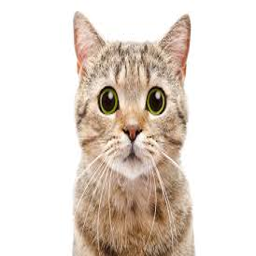

In [2]:
image = Image.open("./cat.jpg").convert("RGB")
image = image.resize((256, 256))
image

In [3]:
image = np.array(image).astype(np.float32) / 255.0
image = torch.from_numpy(image).permute(2, 0, 1).unsqueeze(0)
image.shape

torch.Size([1, 3, 256, 256])

In [6]:
from vae.maskgit.models.vqgan import VQModel
from vae.maskgit.models.config import vqgan_config

In [7]:
model = VQModel(ddconfig=vqgan_config.ddconfig,
                n_embded=vqgan_config.n_embed,
                embed_dim=vqgan_config.embed_dim,
                ckpt_path=r"/\vae\maskgit\checkpoints\vqgan.ckpt")

Restored from D:\pyproject\awesome_diffusion\vae\maskgit\checkpoints\vqgan.ckpt


In [8]:
dec, _ = model(image)

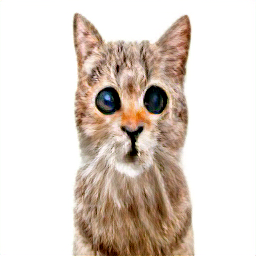

In [10]:
# show dec
dec = dec.clamp(0, 1).squeeze(0).permute(1, 2, 0).detach().numpy()
Image.fromarray((dec * 255).astype(np.uint8))